In [1]:
import pandas as pd
import numpy as np
import missingno as msno

# Loading the excel file
df = pd.read_csv("artifacts\\AppCollTasksVisible20241128.csv", encoding='ISO-8859-1')

In [2]:
# Cheking random 10 rows of the data
df.sample(10)

,TaskStatus,Matter,Matter.Title,TaskType,DeadlineType,Owner,Comments
347,Open,1230.019WO.US,METHODS AND SYSTEMS FOR MODIFYING HEATED WATER...,1 Month Reminder Due,Internal Deadline,Joanna Labban,11/21 - reminder sent; RNFOA due 12/20/24
598,Open,1560.002US,SYSTEMS AND METHODS FOR DETECTING PATHOGENS IN...,Report Notice of Publication,Internal Deadline,Diane Miles,rcvd 11/8/24
323,Open,1215.023D,RING,1 Month Reminder Due,Internal Deadline,Natasha Bantz,Issue Fee due 1/10/25
138,Open,1035.011PCT.EP,"TISSUE ENGAGEMENT DEVICES, SYSTEMS, AND METHODS",Awaiting Confirmation of Filing,Internal Deadline,Natasha Bantz,instr sent to FC per EK 11/13/24
800,Open,2309.004TM,OPEN CIRCUIT,1 Month Reminder Due,Internal Deadline,Ashley Ezzell,FF due 12/19/24
337,Open,1225.003US,CANOPY CONTROL SYSTEM,Reminder Due,Internal Deadline,Joanna Labban,Draft email to EK re: new owner
609,Open,1595.003D.KR,CAMERA,File Power of Attorney,Internal Deadline,Joanna Labban,"11/27 - POA sent to FC; per FC 11/8/24, extend..."
173,Open,1049.005PCT.CN,PRESSURE SENSITIVE FLEXIBLE BUTTON LOCK AND RE...,File Power of Attorney,Internal Deadline,Joanna Labban,"FC 11/1/24, please kindly send us the executed..."
22,Open,1009.053D,CUTTING BOARD,Reminder Due,Internal Deadline,Eric Kleinertz,REXPQ resp due 1/6/25
860,Open,2752.002US,GREEN LINE,Check suspension status,Internal Deadline,Ashley Ezzell,Suspended 4/1/2020


## Filtering process

- Remove the internal deadline 

<Axes: >

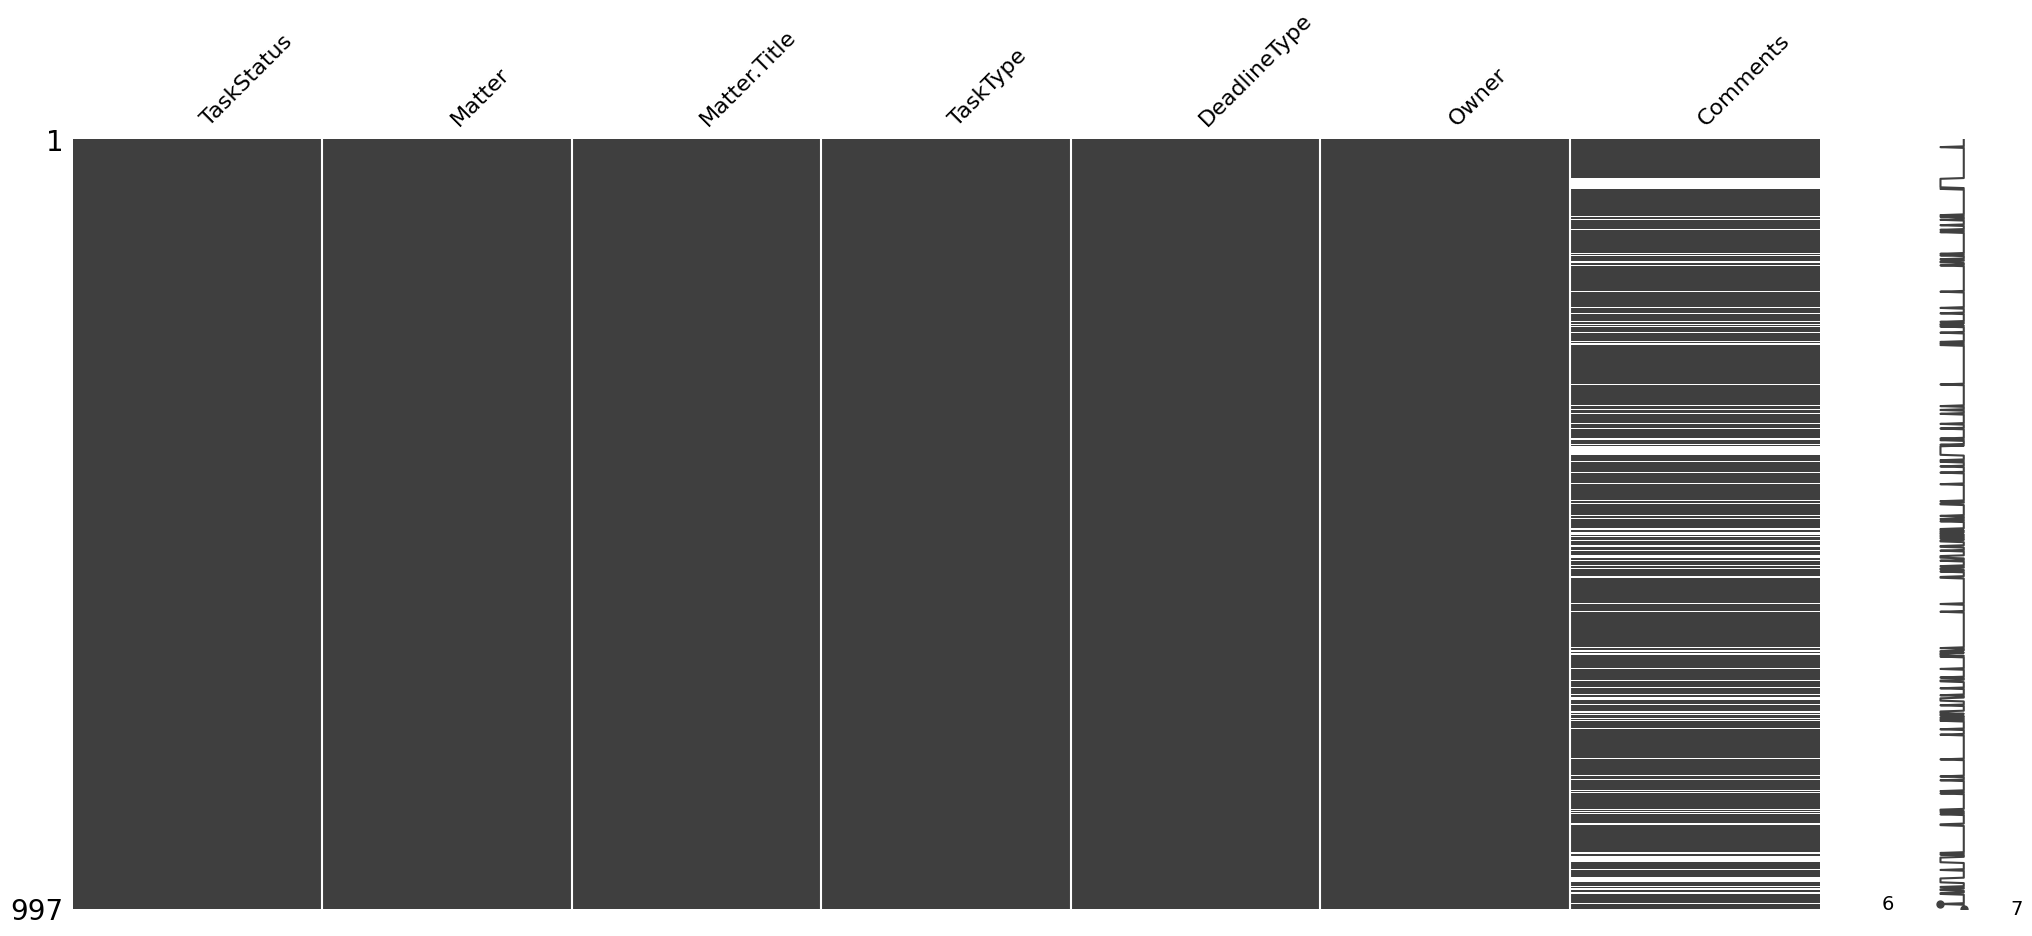

In [7]:
# Visualize missing values
msno.matrix(df)

In [23]:
# Removing all rows with null values
df = df.dropna()
df = df.reset_index(drop=True)

In [24]:
# Removing the internal deadlines
df = df[df['DeadlineType'] != 'Internal Deadline']
df = df.reset_index(drop=True)

In [25]:
indexes_filtered = []

# Iterating over the Owner column to look for Brittany Steele
for i in range(len(df)):

    # Extracting the owner and the Matter title
    owner = df.at[i,'Owner']
    matter_title = df.at[i,'Matter.Title']
    
    if owner == 'Brittany Steele' or owner == 'Faisal Khan' or 'FTO' in matter_title:
        
        # Adding the index
        indexes_filtered.append(i)

In [26]:
indexes_filtered

[144, 145, 146, 147, 148, 149, 150]

In [29]:
trademark_df = df.iloc[indexes_filtered]
trademark_df

,TaskStatus,Matter,Matter.Title,TaskType,DeadlineType,Owner,Comments
144,Open,2732.0011T (24-25),"Cohen Saban, Eli",Special Education Deadlines,Hard External Deadline,Brittany Steele,10:30 am- PHC
145,Open,2732.0020S (24-25),"Kokin, Shlomo",Special Education Deadlines,Hard External Deadline,Brittany Steele,11 am- Prehearing conference
146,Open,2745.0002 (24-25),"Davidovich, Miriam",Special Education Deadlines,Hard External Deadline,Brittany Steele,Hearing Disclosure Due
147,Open,2745.0002 (24-25),"Davidovich, Miriam",Special Education Deadlines,Hard External Deadline,Brittany Steele,11:30 am- Impartial Hearing
148,Open,2745.0004 (24-25),"Nagar, Michael",Special Education Deadlines,Hard External Deadline,Brittany Steele,10 am- Impartial Hearing
149,Open,2745.0010 (24-25),"Silver, Eva",Special Education Deadlines,Hard External Deadline,Brittany Steele,10:00 AM - Pre-Hearing Conference
150,Open,2745.0013 (24-25),"Ausch, Blima",Special Education Deadlines,Hard External Deadline,Brittany Steele,10 am- PHC


In [26]:
# Iterating over the Matter.Title column to look for 'FTO'
for i in range(len(df)):

    # Extracting the Matter title
    
    if 
        print(f"FTO found at {i} index")

TypeError: argument of type 'float' is not iterable

TaskStatus      0
Matter          0
Matter.Title    0
TaskType        0
DeadlineType    0
Owner           0
Comments        0
dtype: int64

In [25]:
df['Matter.Title	'].value_counts()

Matter.Title
PEN                                      7
COOKWARE LID HANDLE                      3
COOKWARE HANDLE                          3
GRIDDLE                                  3
VARIABLE TEMPORARY STRUCTURE             3
                                        ..
BE THE BEST - UNSIGNED                   1
- UNSIGNED                               1
DIRTY VEGAS PIERCED HEARTS - UNSIGNED    1
CHAMPAGNESIA - UNSIGNED                  1
BE A FAN OF TITLE - UNSIGNED             1
Name: count, Length: 249, dtype: int64

In [12]:
df

,TaskStatus,Matter,Matter.Title,TaskType,DeadlineType,Owner,Comments
1,Open,1001.003US1,CONNECTOR FOR A MEDICAL DEVICE,Maintenance Fee 3.5 yrs Due,Extendable External Deadline,Joanna Labban,reminder sent 6/10/24
8,Open,1006.002US2.CIP1,APPARATUS AND METHOD OF NON-INVASIVELY DETERMI...,File Supplemental IDS,Extendable External Deadline,Natasha Bantz,JP OA dtd 11/12/24
10,Open,1006.002US2.CIP1,APPARATUS AND METHOD OF NON-INVASIVELY DETERMI...,Respond to Non-Final Office Action - 3 Month D...,Extendable External Deadline,Eric Kleinertz,NaN
17,Open,1009.041D.CN-1009.042D.CN,CONTAINER,Respond to Foreign Office Action,Hard External Deadline,Eric Kleinertz,10/21 Instructions sent to FA; actual due 12/4...
30,Open,1009.063D,GRILL PAN,File Supplemental IDS,Extendable External Deadline,Natasha Bantz,CN OA dtd 11/8/24
...,...,...,...,...,...,...,...
985,Open,M-000410,- UNSIGNED,File Sections 8 & 15 Declaration of Use/Incont...,Extendable External Deadline,Ana Ojeda,Earliest date §8 can be filed
986,Open,M-000410.002,DIRTY VEGAS PIERCED HEARTS - UNSIGNED,File Sections 8 & 15 Declaration of Use/Incont...,Extendable External Deadline,Ana Ojeda,Earliest date §8 can be filed
988,Open,M-001171,CHAMPAGNESIA - UNSIGNED,File Sections 8 & 15 Declaration of Use/Incont...,Extendable External Deadline,Ana Ojeda,Earliest date §8 can be filed
989,Open,M-001301,BE A FAN OF TITLE - UNSIGNED,File Sections 8 & 9 Declaration of Use/Renewal...,Extendable External Deadline,Ana Ojeda,NaN
